In [2]:
import rasterio
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [9]:
folder_path = "/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01"

In [28]:
import os
def check_inside_folder(folder_path):
    for event in os.listdir(folder_path):  # E.g., EMSRXXX folders
        event_dir = os.path.join(folder_path, event)
        print(event_dir)

def get_sentinel_file_path():
    pass
def get_del_file_path():
    pass


check_inside_folder(folder_path)
del_tif = "/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_DEL.tif"
sentinel_tif = "/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_S2L2A.tif"
sentinel_tif1 = "/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI02/EMSR220_AOI02_01/EMSR220_AOI02_01_DEL.tif"



/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_CM.tif
/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_ESA_LC.png
/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_CM.png
/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_DEL.tif
/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_ESA_LC_old.tif
/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_Esri10_LC.png
/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_S2L2A.png
/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_ESA_LC.tif
/vol/home/s4406559/UC_project

In [8]:


#Sentinel bands 2, 3, 4, 8A, 11, and 12

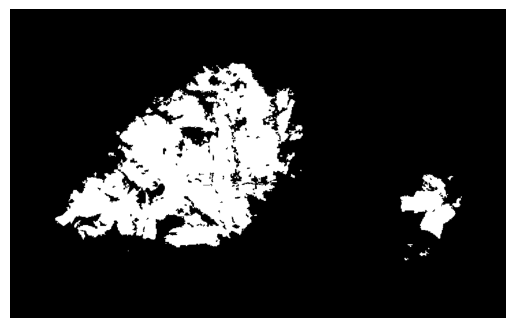

In [29]:
##View delineation map##

mask_image = Image.open(del_tif)
mask_array = np.array(mask_image)
# Display
plt.imshow(mask_array, cmap= 'gray')  # Use cmap if grayscale
plt.axis('off')
plt.show()


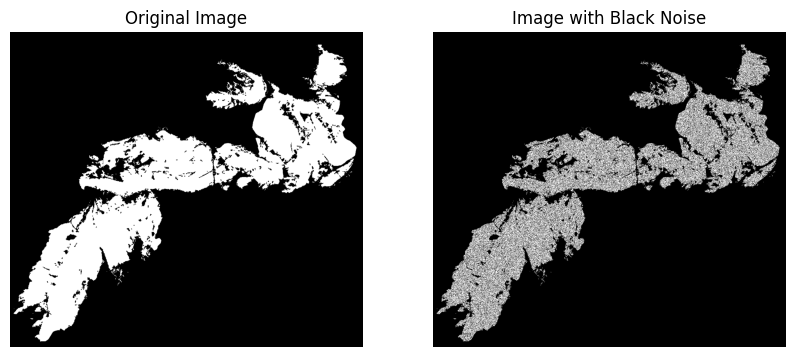

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the binary image
mask_image = Image.open(sentinel_tif1)  # Replace with your file path
mask_array = np.array(mask_image)

# Define the percentage of pixels to make black (noise level)
noise_percentage = 0.4  # 10% noise

# Get the image dimensions
height, width = mask_array.shape

# Generate random indices for black noise
num_noise_pixels = int(noise_percentage * height * width)  # Total pixels to make black
noise_indices = (
    np.random.randint(0, height, size=num_noise_pixels),  # Random y-coordinates
    np.random.randint(0, width, size=num_noise_pixels)    # Random x-coordinates
)

# Add noise by setting random pixels to 0 (black)
noisy_mask = mask_array.copy()
noisy_mask[noise_indices] = 0

# Display the original and noisy images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(mask_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Noisy image
plt.subplot(1, 2, 2)
plt.imshow(noisy_mask, cmap="gray")
plt.title("Image with Black Noise")
plt.axis("off")
plt.show()

In [38]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [31]:
import numpy as np
import rasterio
from scipy.ndimage import label
import matplotlib.pyplot as plt

def extract_bounding_boxes(tif_file):
    """
    Extract bounding boxes from a binary TIFF file.
    
    Args:
        tif_file (str): Path to the binary TIFF file.
    
    Returns:
        list of tuples: List of bounding boxes in the format (min_row, min_col, max_row, max_col).
    """
    with rasterio.open(tif_file) as src:
        # Read the binary mask
        mask = src.read(1)
    
    # Ensure the mask is binary (if not already)
    binary_mask = (mask > 0).astype(np.uint8)
    
    # Label connected components
    labeled_array, num_features = label(binary_mask)
    
    # Extract bounding boxes for each connected component
    bounding_boxes = []
    for region in range(1, num_features + 1):
        # Get rows and columns of the current region
        rows, cols = np.where(labeled_array == region)
        min_row, max_row = rows.min(), rows.max()
        min_col, max_col = cols.min(), cols.max()
        bounding_boxes.append((min_row, min_col, max_row, max_col))
    
    return bounding_boxes

# Example usage

bounding_boxes_gt = extract_bounding_boxes(sentinel_tif1)
bounding_boxes_pred = extract_bounding_boxes(del_tif)

# Print bounding box information
# for i, box in enumerate(bounding_boxes):
#     print(f"Bounding Box {i + 1}: {box}")

print(len(bounding_boxes_pred))
print(len(bounding_boxes_gt))

76
468


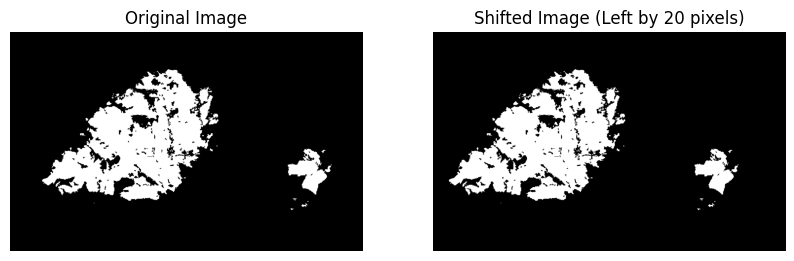

In [32]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

def shift_image_left(image_array, shift_by=10):
    """
    Shift a binary image to the left by a specified number of pixels.
    
    Args:
        image_array (np.array): The binary image as a NumPy array.
        shift_by (int): Number of pixels to shift to the left.
    
    Returns:
        np.array: The shifted image.
    """
    # Shift the image to the left
    shifted_image = np.zeros_like(image_array)  # Create a blank image of the same size
    shifted_image[:, :-shift_by] = image_array[:, shift_by:]  # Shift pixels left
    return shifted_image

# Load the binary image (example)
with rasterio.open(del_tif) as src:
    image_array = src.read(1)

# Shift the image left by 20 pixels
shifted_image = shift_image_left(image_array, shift_by=50)

# Visualize the original and shifted images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(shifted_image, cmap="gray")
plt.title("Shifted Image (Left by 20 pixels)")
plt.axis("off")

plt.show()


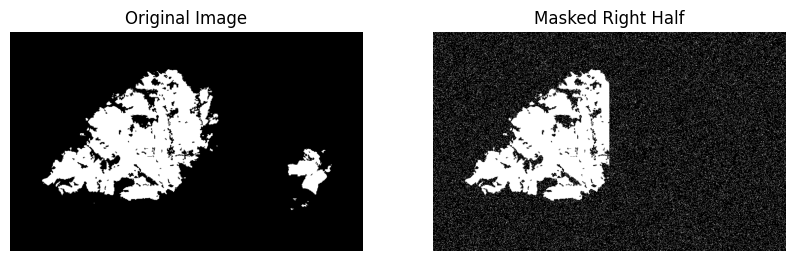

In [40]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

def mask_right_half(image_array):
    """
    Mask all white values (1) on the right side (beyond half of the image width) as black (0).
    
    Args:
        image_array (np.array): The binary image as a NumPy array.
    
    Returns:
        np.array: The modified image with white values on the right side masked as black.
    """
    # Get the image dimensions
    height, width = image_array.shape

    # Create a condition for the right half of the image
    condition = (np.indices(image_array.shape)[1] >= width // 2) & (image_array == 1)

    # Apply the condition to mask white values as black
    masked_image = image_array.copy()
    masked_image[condition] = 0  # Set to black (0)
    num_pixels = int(0.1 * height * width)
    random_rows = np.random.randint(0, height, size=num_pixels)
    random_cols = np.random.randint(0, width, size=num_pixels)
    
    # Set random positions to 1
    masked_image[random_rows, random_cols] = 1
    return masked_image

# Load the binary image
with rasterio.open(del_tif) as src:
    image_array = src.read(1)

# Mask white values on the right half of the image
masked_image = mask_right_half(image_array)

# Visualize the original and masked images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masked_image, cmap="gray")
plt.title("Masked Right Half")
plt.axis("off")

plt.show()

 


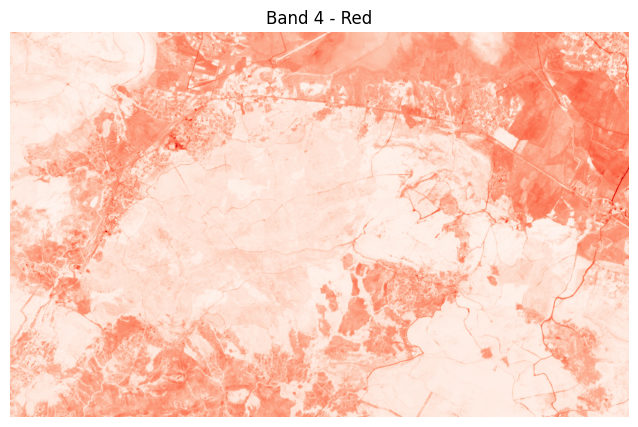

In [34]:
# Open the TIF file
with rasterio.open(sentinel_tif) as src:
    # Read specific bands based on Sentinel mapping
    blue = src.read(2)   # Band 2 (B02): Blue
    green = src.read(3)  # Band 3 (B03): Green
    red = src.read(4)    # Band 4 (B04): Red
    nnir = src.read(9)
    swir1 = src.read(11)
    swir2 = src.read(12)
# Display the bands
plt.figure(figsize=(10, 5))
plt.imshow(red, cmap='Reds')
plt.title("Band 4 - Red")
plt.axis('off')
plt.show()


[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]


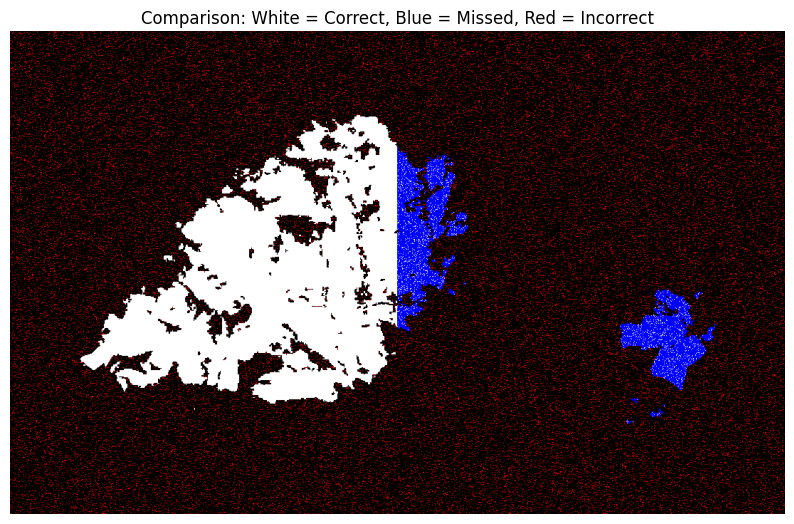

In [41]:

def compare_tiffs(ground_truth, prediction):
    """
    Compare ground truth and prediction TIFF files to highlight overlaps and mismatches.
    
    Args:
        ground_truth_tif (str): Path to the ground truth TIFF file.
        prediction_tif (str): Path to the prediction TIFF file.
    
    Returns:
        np.array: Final image showing matches and mismatches.
    """
    # Load the TIFF files
    # with rasterio.open(ground_truth_tif) as gt_src:
    #     ground_truth = gt_src.read(1)  # Ground truth mask (binary)
    
    # Ensure the masks are binary
    ground_truth = (ground_truth > 0).astype(np.uint8)
    prediction = (prediction > 0).astype(np.uint8)
    print(prediction)
    # Compute regions
    true_positive = (ground_truth == 1) & (prediction == 1)  # Correct prediction
    false_negative = (ground_truth == 1) & (prediction == 0)  # Missed regions
    false_positive = (ground_truth == 0) & (prediction == 1)  # Incorrectly marked

    # Create a color-coded result
    final_image = np.zeros((ground_truth.shape[0], ground_truth.shape[1], 3), dtype=np.uint8)
    final_image[true_positive] = [255, 255, 255]  # White for matches
    final_image[false_negative] = [0, 0, 255]    # Blue for missed areas
    final_image[false_positive] = [255, 0, 0]    # Red for incorrect marks

    return final_image

# Example usage
ground_truth_tif = sentinel_tif1  # Replace with actual path
prediction_tif = del_tif    # Replace with actual path

# Compare TIFFs and generate the final image
final_image = compare_tiffs(image_array, masked_image)

# Display the final image
plt.figure(figsize=(10, 10))
plt.imshow(final_image)
plt.title("Comparison: White = Correct, Blue = Missed, Red = Incorrect")
plt.axis("off")
plt.show()


In [27]:
#view sentinel image
# Open the TIF file
with rasterio.open(sentinel_tif) as src:
    # Read specific bands based on Sentinel mapping
    blue = src.read(2)   # Band 2 (B02): Blue
    green = src.read(3)  # Band 3 (B03): Green
    red = src.read(4)    # Band 4 (B04): Red
    nnir = src.read(9)
    swir1 = src.read(11)
    swir2 = src.read(12)
# Display the bands
plt.figure(figsize=(10, 5))
plt.imshow(red, cmap='Reds')
plt.title("Band 4 - Red")
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(green, cmap='Greens')
plt.title("Band 3 - Green")
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(blue, cmap='Blues')
plt.title("Band 2 - Blue")
plt.axis('off')
plt.show()

RasterioIOError: /vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI02/EMSR220_AOI01_01/EMSR220_AOI01_01_S2L2A.tif: No such file or directory

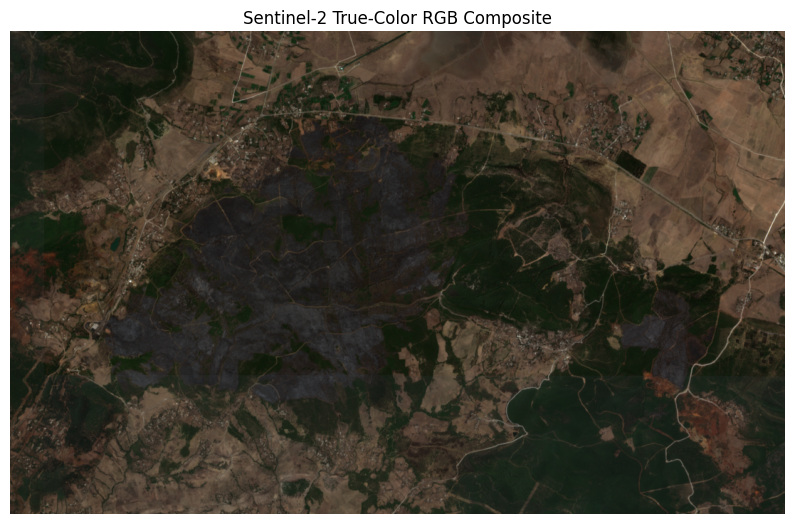

In [26]:
# Normalize the bands for display
red_norm = red / red.max()
green_norm = green / green.max()
blue_norm = blue / blue.max()
nnir_norm = nnir/nnir.max()
swir1_norm = swir1/swir1.max()
swir2_norm = swir2/swir2.max()
# Stack into an RGB image
rgb_image = np.dstack((red_norm, green_norm, blue_norm ))

# Display the RGB composite
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image)
plt.title("Sentinel-2 True-Color RGB Composite")
plt.axis('off')
plt.show()

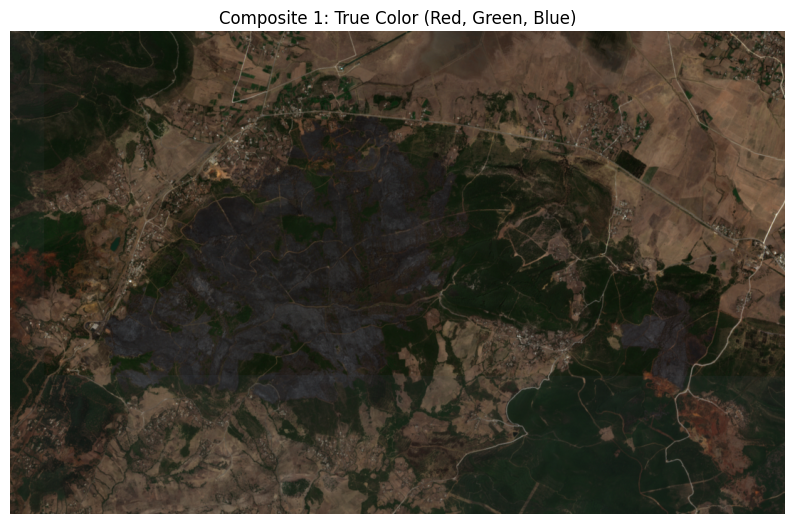

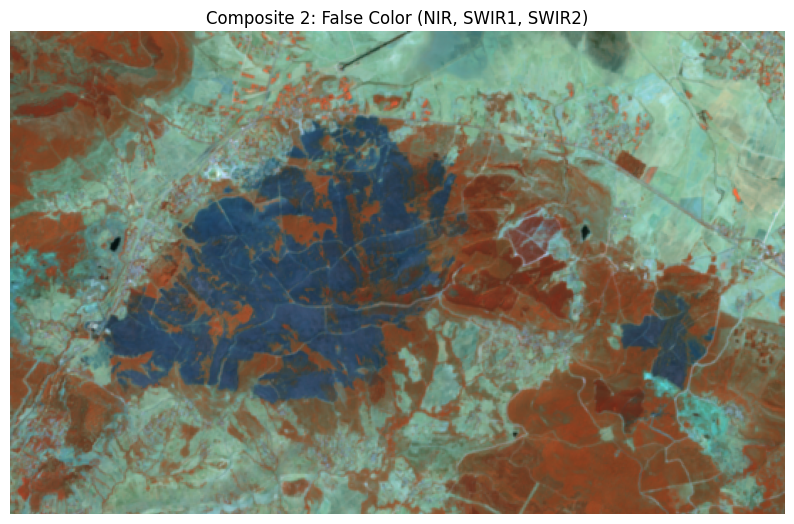

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Create two RGB composites
rgb_composite_1 = np.dstack((red_norm, green_norm, blue_norm))  # Composite 1
rgb_composite_2 = np.dstack((nnir_norm, swir1_norm, swir2_norm))  # Composite 2

# Plot Composite 1
plt.figure(figsize=(10, 8))
plt.imshow(rgb_composite_1)
plt.title("Composite 1: True Color (Red, Green, Blue)")
plt.axis("off")
plt.show()

# Plot Composite 2
plt.figure(figsize=(10, 8))
plt.imshow(rgb_composite_2)
plt.title("Composite 2: False Color (NIR, SWIR1, SWIR2)")
plt.axis("off")
plt.show()


In [ ]:
cd
mkdir hls_burn_scars
cd hls_burn_scars
wget https://huggingface.co/datasets/ibm-nasa-geospatial/hls_burn_scars/resolve/main/hls_burn_scars.tar.gz?download=true -O hls_burn_scars.tar.gz
tar -xvf hls_burn_scars.tar.gz

In [18]:
#get information on bands in sentinel tif file
import json
with rasterio.open(sentinel_tif) as stif:
    print("Number of bands: ", stif.count)
    print(stif.width, stif.height)
    print(stif.bounds)
    
json_path = "/vol/home/s4406559/UC_project/git-lfs-3.2.0/wildfires-cems/val/EMSR220/AOI01/EMSR220_AOI01_01/EMSR220_AOI01_01_S2L2A.json" 

# Read the JSON metadata file
with open(json_path, 'r') as json_file:
    metadata = json.load(json_file)
    print(metadata)


Number of bands:  12
1089 678
BoundingBox(left=9.102577507833358, bottom=37.02754001652824, right=9.225167319301594, top=37.08846237864031)
{'headers': {'accept': 'image/tiff', 'content-type': 'application/json'}, 'payload': {'evalscript': '//VERSION=3\nfunction setup() {\n    return {\n        input: [{\n            bands: ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12"],\n        }],\n        output: {\n            bands: 12,\n            sampleType: "FLOAT32"\n        }\n    };\n}\nfunction evaluatePixel(sample) {\n    return [sample.B01,\n    sample.B02,\n    sample.B03,\n    sample.B04,\n    sample.B05,\n    sample.B06,\n    sample.B07,\n    sample.B08,\n    sample.B8A,\n    sample.B09,\n    sample.B11,\n    sample.B12\n    ];\n}', 'input': {'bounds': {'bbox': [9.102577507833358, 37.02754001652824, 9.225167319301594, 37.08846237864031], 'properties': {'crs': 'http://www.opengis.net/def/crs/EPSG/0/4326'}}, 'data': [{'dataFilter': {'maxCloudCovera

In [ ]:
#for hls fix on order 
from shapely.geometry import Polygon
from shapely.geometry.polygon import orient
import geopandas as gpd

# Load your polygon data (e.g., from a GeoJSON or shapefile)
input_file = "path_to_your_input_file.shp"  # Replace with your file
gdf = gpd.read_file(input_file)

# Ensure polygons are counter-clockwise
gdf['geometry'] = gdf['geometry'].apply(lambda geom: orient(geom, sign=1.0))

# Save the corrected file
output_file = "path_to_fixed_file.shp"  # Replace with your desired output file
gdf.to_file(output_file)
